In [ ]:
import os
import time
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import timm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import torch.nn.functional as F
from PIL import Image
import cv2
import random
from sklearn.model_selection import train_test_split
import torch.nn.utils.prune as prune
import json
import zipfile
from google.colab import drive

drive.mount('/content/drive')

with zipfile.ZipFile("/content/drive/MyDrive/Yeni WinRAR ZIP arşivi2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

Mounted at /content/drive


burda mimari yapısını tabloya çeviriyorum tez için

In [ ]:
models_info = [
    {"name": "resnet18", "path": "/content/drive/MyDrive/resnet_25_epoch/standart/resnet18.pth"},
    {"name": "resnet34", "path": "/content/drive/MyDrive/resnet_25_epoch/standart/resnet34.pth"},
    {"name": "resnet50", "path": "/content/drive/MyDrive/resnet_25_epoch/standart/resnet50.pth"},
]

for m in models_info:
    print(f"\n{'='*40}\nModel: {m['name']}\n{'='*40}")
    model = timm.create_model(m["name"], pretrained=False, num_classes=10)
    print(model)


Model: resnet18
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d

aşağıda ne var inan hatırlamıyorum

In [ ]:
#[np.int64(8), np.int64(15), np.int64(33), np.int64(35), np.int64(47), np.int64(55), np.int64(63), np.int64(66), np.int64(68), np.int64(76), np.int64(94), np.int64(110), np.int64(116), np.int64(118), np.int64(141), np.int64(159), np.int64(172), np.int64(193), np.int64(207), np.int64(230), np.int64(241), np.int64(250), np.int64(252), np.int64(257), np.int64(277), np.int64(289), np.int64(304), np.int64(313), np.int64(323), np.int64(354), np.int64(355), np.int64(370), np.int64(372), np.int64(384), np.int64(388), np.int64(403), np.int64(414), np.int64(416), np.int64(459), np.int64(473), np.int64(486), np.int64(495)]
#[np.int64(12), np.int64(26), np.int64(34), np.int64(64), np.int64(77), np.int64(112), np.int64(127), np.int64(136), np.int64(141), np.int64(156), np.int64(169), np.int64(170), np.int64(185), np.int64(194), np.int64(214), np.int64(217), np.int64(226), np.int64(230), np.int64(235), np.int64(257), np.int64(262), np.int64(267), np.int64(274), np.int64(278), np.int64(285), np.int64(295), np.int64(302), np.int64(313), np.int64(324), np.int64(331), np.int64(333), np.int64(336), np.int64(349), np.int64(372), np.int64(383), np.int64(391), np.int64(397), np.int64(402), np.int64(404), np.int64(407), np.int64(417), np.int64(418), np.int64(433), np.int64(447), np.int64(466), np.int64(481), np.int64(485)]
#[np.int64(14), np.int64(153), np.int64(166), np.int64(181), np.int64(294), np.int64(371), np.int64(435), np.int64(506), np.int64(510), np.int64(520), np.int64(541), np.int64(644), np.int64(645), np.int64(663), np.int64(741), np.int64(773), np.int64(778), np.int64(824), np.int64(866), np.int64(908), np.int64(922), np.int64(988), np.int64(1017), np.int64(1081), np.int64(1153), np.int64(1181), np.int64(1185), np.int64(1193), np.int64(1197), np.int64(1225), np.int64(1239), np.int64(1266), np.int64(1329), np.int64(1492), np.int64(1532), np.int64(1545), np.int64(1566), np.int64(1590), np.int64(1652), np.int64(1719), np.int64(1736), np.int64(1756), np.int64(1898), np.int64(1994), np.int64(2017)]

important_channels_combined = [[np.int64(12), np.int64(26), np.int64(34), np.int64(64), np.int64(77), np.int64(112), np.int64(127), np.int64(136), np.int64(141), np.int64(156), np.int64(169), np.int64(170), np.int64(185), np.int64(194), np.int64(214), np.int64(217), np.int64(226), np.int64(230), np.int64(235), np.int64(257), np.int64(262), np.int64(267), np.int64(274), np.int64(278), np.int64(285), np.int64(295), np.int64(302), np.int64(313), np.int64(324), np.int64(331), np.int64(333), np.int64(336), np.int64(349), np.int64(372), np.int64(383), np.int64(391), np.int64(397), np.int64(402), np.int64(404), np.int64(407), np.int64(417), np.int64(418), np.int64(433), np.int64(447), np.int64(466), np.int64(481), np.int64(485)]]

25 epoch eğitilmiş olan 18 ağırlıklarıyla 34 modelini 10 epochta prune edicem

In [ ]:
#models_path_list = ["/content/drive/MyDrive/resnet_25_epoch/resnet18.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet34.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet50.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet101.pth"]
#models_name_list = ["resnet18", "resnet34", "resnet50", "resnet101"]
important_channels_combined = [[np.int64(8), np.int64(15), np.int64(33), np.int64(35), np.int64(47), np.int64(55), np.int64(63), np.int64(66), np.int64(68), np.int64(76), np.int64(94), np.int64(110), np.int64(116), np.int64(118), np.int64(141), np.int64(159), np.int64(172), np.int64(193), np.int64(207), np.int64(230), np.int64(241), np.int64(250), np.int64(252), np.int64(257), np.int64(277), np.int64(289), np.int64(304), np.int64(313), np.int64(323), np.int64(354), np.int64(355), np.int64(370), np.int64(372), np.int64(384), np.int64(388), np.int64(403), np.int64(414), np.int64(416), np.int64(459), np.int64(473), np.int64(486), np.int64(495)]]

for sayı in range(1,11):
  for i in important_channels_combined:

    # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
    # Ayarlar
    img_size = 224
    num_classes = 10
    augmented_dir = "/content/augmentation"
    validation_dir = "/content/without_augmentation"
    batch_size = 32
    test_ratio = 0.11
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Transform
    common_transforms = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Dataset yükle
    full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
    targets = [s[1] for s in full_dataset.samples]
    class_names = full_dataset.classes

    train_idx, test_idx = train_test_split(
        np.arange(len(full_dataset)),
        test_size=test_ratio,
        stratify=targets,
        random_state=42
    )

    train_dataset = Subset(full_dataset, train_idx)
    test_dataset = Subset(full_dataset, test_idx)
    val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    #early stop mekanizması
    class EarlyStopping:
        def __init__(self, patience=5, min_delta=0.001):
            self.patience = patience
            self.min_delta = min_delta
            self.counter = 0
            self.best_loss = None
            self.early_stop = False

        def __call__(self, val_loss):
            if self.best_loss is None:
                self.best_loss = val_loss
            elif self.best_loss - val_loss > self.min_delta:
                self.best_loss = val_loss
                self.counter = 0
            else:
                self.counter += 1
                if self.counter >= self.patience:
                    self.early_stop = True

    # model2i oluştur
    model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
    state_dict = torch.load("/content/drive/MyDrive/resnet_25_epoch/standart/resnet34.pth", map_location=device)
    state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
    model2.load_state_dict(state_dict, strict=False)
    model2.to(device)

    # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
    selected_channels = i  # daha önce bulduğum semantic kanallar
    conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

    # Kanal dışı olanları %100 prune et
    total_channels = conv_layer.out_channels
    mask = torch.zeros(total_channels, device=device)
    for ch in selected_channels:
        if ch < total_channels:
            mask[ch] = 1.0
    prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

    # Kayıp ve optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

    # Eğitim
    epochs = 1
    train_losses = []
    val_losses   = []

    for epoch in range(1, epochs+1):
        # -- Train --
        model2.train()
        running_train_loss = 0.0
        t0 = time.time()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model2(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        avg_train_loss = running_train_loss / len(train_loader)

        # -- Validation --
        model2.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model2(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
        avg_val_loss = running_val_loss / len(test_loader)
        elapsed = time.time() - t0
        print(f"Epoch [{epoch}/{epochs}]"
              f"  Train Loss: {avg_train_loss:.4f}"
              f"  Val Loss: {avg_val_loss:.4f}"
              f"  Time: {elapsed:.2f}s")
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
    plt.figure(figsize=(6,4))
    epochs_range = range(1, epochs+1)
    plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
    plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Resnet 34 Training & Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ağırlıkları kaydet
    torch.save(model2.state_dict(), "resnet34_pruned.pth")

    # Değerlendirme
    model2.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    report = classification_report(
        all_labels,
        all_preds,
        target_names=class_names,
        output_dict=True
    )

    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(4)

    if 'accuracy' in report_df.index:
        accuracy_row = report_df.loc[['accuracy']]
        report_df = report_df.drop(index='accuracy')

    # Son tabloyu göster
    print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
    display(report_df)

    print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
    '''
    cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('📉 Resnet 34 pruned Confusion Matrix')
    plt.tight_layout()
    plt.show()
    '''

KeyboardInterrupt: 

Epoch [1/1]  Train Loss: 0.2896  Val Loss: 0.0659  Time: 34.46s


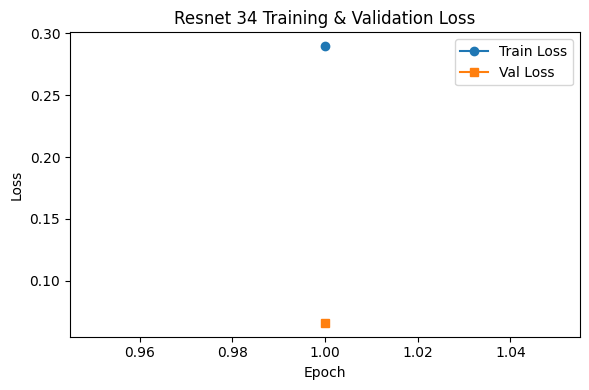


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,1.0000,1.0000,211.0
Tomato___Early_blight,0.9889,0.8990,0.9418,99.0
Tomato___Late_blight,0.9686,0.9788,0.9737,189.0
Tomato___Leaf_Mold,1.0000,0.9798,0.9898,99.0
Tomato___Septoria_leaf_spot,0.9722,1.0000,0.9859,175.0
Tomato___Spider_mites Two-spotted_spider_mite,1.0000,0.9819,0.9909,166.0
Tomato___Target_Spot,0.9392,1.0000,0.9686,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9981,0.9972,531.0
Tomato___Tomato_mosaic_virus,0.9899,0.9899,0.9899,99.0
Tomato___healthy,0.9935,0.9745,0.9839,157.0



✅ Genel Accuracy: 0.9866
Epoch [1/1]  Train Loss: 0.3052  Val Loss: 0.0885  Time: 34.29s


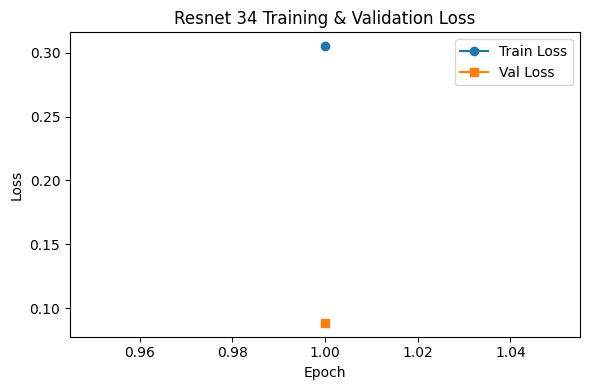


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9859,0.9953,0.9906,211.0
Tomato___Early_blight,0.9798,0.9798,0.9798,99.0
Tomato___Late_blight,0.9946,0.9683,0.9812,189.0
Tomato___Leaf_Mold,0.9600,0.9697,0.9648,99.0
Tomato___Septoria_leaf_spot,0.9775,0.9943,0.9858,175.0
Tomato___Spider_mites Two-spotted_spider_mite,1.0000,0.9036,0.9494,166.0
Tomato___Target_Spot,0.8968,1.0000,0.9456,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9962,0.9962,531.0
Tomato___Tomato_mosaic_virus,0.9900,1.0000,0.9950,99.0
Tomato___healthy,0.9935,0.9809,0.9872,157.0



✅ Genel Accuracy: 0.9818
Epoch [1/1]  Train Loss: 0.3076  Val Loss: 0.0680  Time: 34.58s


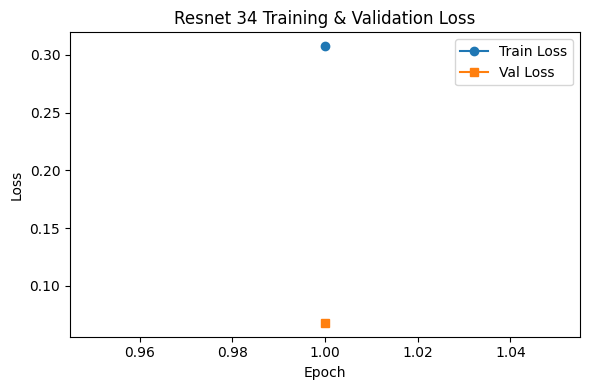


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9858,0.9858,0.9858,211.0
Tomato___Early_blight,0.9889,0.8990,0.9418,99.0
Tomato___Late_blight,0.9588,0.9841,0.9713,189.0
Tomato___Leaf_Mold,1.0000,0.9798,0.9898,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9886,0.9914,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9821,0.9940,0.9880,166.0
Tomato___Target_Spot,0.9855,0.9784,0.9819,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9944,0.9981,0.9962,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9752,1.0000,0.9874,157.0



✅ Genel Accuracy: 0.9866
Epoch [1/1]  Train Loss: 0.3160  Val Loss: 0.0658  Time: 34.45s


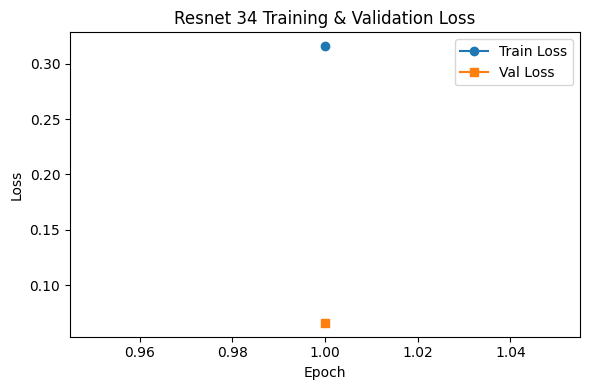


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9906,0.9953,0.9929,211.0
Tomato___Early_blight,0.9892,0.9293,0.9583,99.0
Tomato___Late_blight,0.9787,0.9735,0.9761,189.0
Tomato___Leaf_Mold,0.9519,1.0000,0.9754,99.0
Tomato___Septoria_leaf_spot,0.9773,0.9829,0.9801,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9820,0.9880,0.9850,166.0
Tomato___Target_Spot,0.9786,0.9856,0.9821,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9981,0.9972,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9935,0.9745,0.9839,157.0



✅ Genel Accuracy: 0.9866
Epoch [1/1]  Train Loss: 0.3013  Val Loss: 0.0661  Time: 34.43s


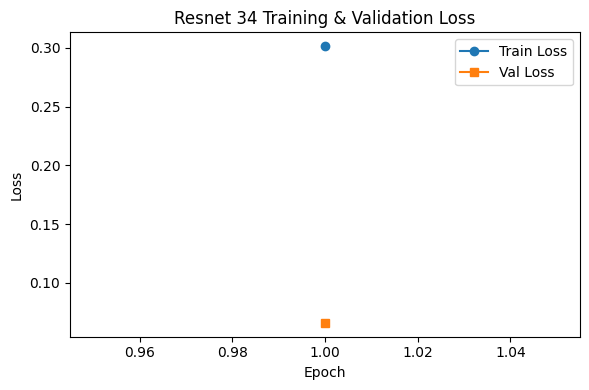


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9585,0.9858,0.9720,211.0
Tomato___Early_blight,0.9890,0.9091,0.9474,99.0
Tomato___Late_blight,0.9894,0.9894,0.9894,189.0
Tomato___Leaf_Mold,0.9900,1.0000,0.9950,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9943,0.9943,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9763,0.9940,0.9851,166.0
Tomato___Target_Spot,0.9925,0.9496,0.9706,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9907,1.0000,0.9953,531.0
Tomato___Tomato_mosaic_virus,1.0000,0.9899,0.9949,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9866
Epoch [1/1]  Train Loss: 0.2839  Val Loss: 0.0854  Time: 34.51s


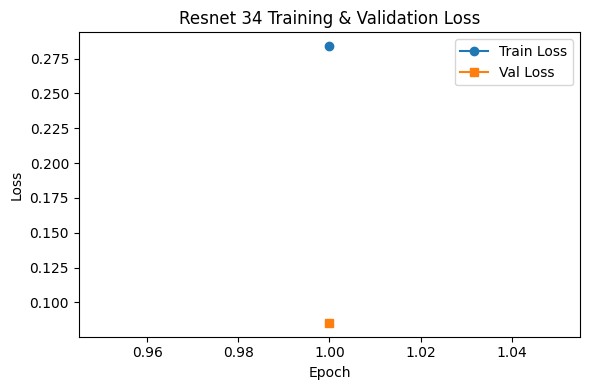


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9712,0.9573,0.9642,211.0
Tomato___Early_blight,0.9872,0.7778,0.8701,99.0
Tomato___Late_blight,0.9122,0.9894,0.9492,189.0
Tomato___Leaf_Mold,0.9900,1.0000,0.9950,99.0
Tomato___Septoria_leaf_spot,1.0000,0.9771,0.9884,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9591,0.9880,0.9733,166.0
Tomato___Target_Spot,0.9853,0.9640,0.9745,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9797,0.9981,0.9888,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9936,0.9873,0.9904,157.0



✅ Genel Accuracy: 0.9748
Epoch [1/1]  Train Loss: 0.3011  Val Loss: 0.0546  Time: 34.64s


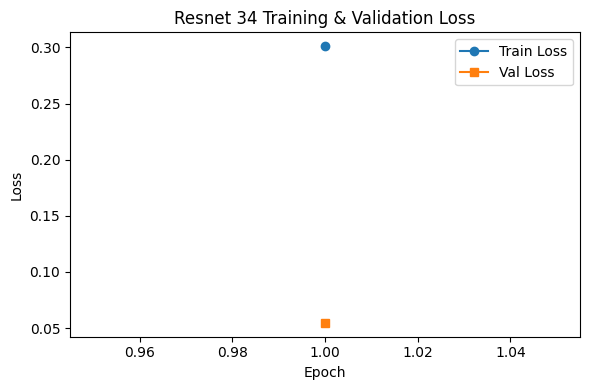


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9953,0.9953,0.9953,211.0
Tomato___Early_blight,0.9789,0.9394,0.9588,99.0
Tomato___Late_blight,0.9840,0.9788,0.9814,189.0
Tomato___Leaf_Mold,1.0000,1.0000,1.0000,99.0
Tomato___Septoria_leaf_spot,1.0000,1.0000,1.0000,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9940,0.9940,0.9940,166.0
Tomato___Target_Spot,0.9789,1.0000,0.9893,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9981,0.9972,531.0
Tomato___Tomato_mosaic_virus,0.9900,1.0000,0.9950,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9925
Epoch [1/1]  Train Loss: 0.2977  Val Loss: 0.0651  Time: 34.54s


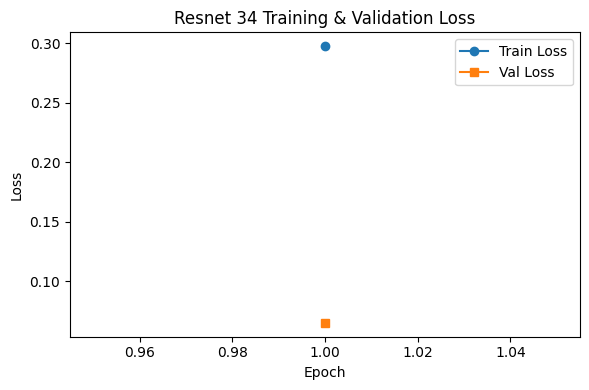


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9812,0.9905,0.9858,211.0
Tomato___Early_blight,1.0000,0.8788,0.9355,99.0
Tomato___Late_blight,0.9447,0.9947,0.9691,189.0
Tomato___Leaf_Mold,1.0000,1.0000,1.0000,99.0
Tomato___Septoria_leaf_spot,0.9943,1.0000,0.9972,175.0
Tomato___Spider_mites Two-spotted_spider_mite,1.0000,0.9880,0.9939,166.0
Tomato___Target_Spot,0.9927,0.9784,0.9855,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9981,0.9981,0.9981,531.0
Tomato___Tomato_mosaic_virus,0.9802,1.0000,0.9900,99.0
Tomato___healthy,0.9873,0.9936,0.9905,157.0



✅ Genel Accuracy: 0.9882
Epoch [1/1]  Train Loss: 0.2947  Val Loss: 0.0726  Time: 34.61s


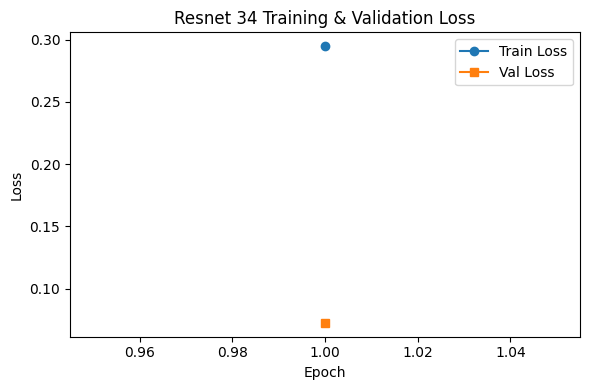


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9717,0.9763,0.9740,211.0
Tomato___Early_blight,0.9890,0.9091,0.9474,99.0
Tomato___Late_blight,0.9691,0.9947,0.9817,189.0
Tomato___Leaf_Mold,0.9519,1.0000,0.9754,99.0
Tomato___Septoria_leaf_spot,0.9611,0.9886,0.9746,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9878,0.9759,0.9818,166.0
Tomato___Target_Spot,0.9784,0.9784,0.9784,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9944,1.0000,0.9972,531.0
Tomato___Tomato_mosaic_virus,0.9891,0.9192,0.9529,99.0
Tomato___healthy,0.9935,0.9809,0.9872,157.0



✅ Genel Accuracy: 0.9812
Epoch [1/1]  Train Loss: 0.2923  Val Loss: 0.0578  Time: 34.45s


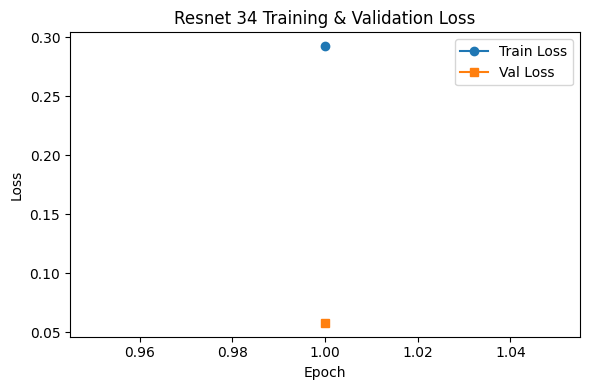


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,0.9953,0.9976,211.0
Tomato___Early_blight,0.9608,0.9899,0.9751,99.0
Tomato___Late_blight,0.9894,0.9841,0.9867,189.0
Tomato___Leaf_Mold,0.9900,1.0000,0.9950,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9886,0.9914,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9708,1.0000,0.9852,166.0
Tomato___Target_Spot,1.0000,0.9784,0.9891,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.0000,0.9944,0.9972,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9925


In [ ]:
#models_path_list = ["/content/drive/MyDrive/resnet_25_epoch/resnet18.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet34.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet50.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet101.pth"]
#models_name_list = ["resnet18", "resnet34", "resnet50", "resnet101"]
important_channels_combined = [[np.int64(12), np.int64(26), np.int64(34), np.int64(64), np.int64(77), np.int64(112), np.int64(127), np.int64(136), np.int64(141), np.int64(156), np.int64(169), np.int64(170), np.int64(185), np.int64(194), np.int64(214), np.int64(217), np.int64(226), np.int64(230), np.int64(235), np.int64(257), np.int64(262), np.int64(267), np.int64(274), np.int64(278), np.int64(285), np.int64(295), np.int64(302), np.int64(313), np.int64(324), np.int64(331), np.int64(333), np.int64(336), np.int64(349), np.int64(372), np.int64(383), np.int64(391), np.int64(397), np.int64(402), np.int64(404), np.int64(407), np.int64(417), np.int64(418), np.int64(433), np.int64(447), np.int64(466), np.int64(481), np.int64(485)]]
for sayı in range(1,11):
  for i in important_channels_combined:

    # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
    # Ayarlar
    img_size = 224
    num_classes = 10
    augmented_dir = "/content/augmentation"
    validation_dir = "/content/without_augmentation"
    batch_size = 32
    test_ratio = 0.11
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Transform
    common_transforms = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Dataset yükle
    full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
    targets = [s[1] for s in full_dataset.samples]
    class_names = full_dataset.classes

    train_idx, test_idx = train_test_split(
        np.arange(len(full_dataset)),
        test_size=test_ratio,
        stratify=targets,
        random_state=42
    )

    train_dataset = Subset(full_dataset, train_idx)
    test_dataset = Subset(full_dataset, test_idx)
    val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    #early stop mekanizması
    class EarlyStopping:
        def __init__(self, patience=5, min_delta=0.001):
            self.patience = patience
            self.min_delta = min_delta
            self.counter = 0
            self.best_loss = None
            self.early_stop = False

        def __call__(self, val_loss):
            if self.best_loss is None:
                self.best_loss = val_loss
            elif self.best_loss - val_loss > self.min_delta:
                self.best_loss = val_loss
                self.counter = 0
            else:
                self.counter += 1
                if self.counter >= self.patience:
                    self.early_stop = True

    # model2i oluştur
    model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
    state_dict = torch.load("/content/drive/MyDrive/resnet_25_epoch/standart/resnet34.pth", map_location=device)
    state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
    model2.load_state_dict(state_dict, strict=False)
    model2.to(device)

    # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
    selected_channels = i  # daha önce bulduğum semantic kanallar
    conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

    # Kanal dışı olanları %100 prune et
    total_channels = conv_layer.out_channels
    mask = torch.zeros(total_channels, device=device)
    for ch in selected_channels:
        if ch < total_channels:
            mask[ch] = 1.0
    prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

    # Kayıp ve optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

    # Eğitim
    epochs = 1
    train_losses = []
    val_losses   = []

    for epoch in range(1, epochs+1):
        # -- Train --
        model2.train()
        running_train_loss = 0.0
        t0 = time.time()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model2(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        avg_train_loss = running_train_loss / len(train_loader)

        # -- Validation --
        model2.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model2(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
        avg_val_loss = running_val_loss / len(test_loader)
        elapsed = time.time() - t0
        print(f"Epoch [{epoch}/{epochs}]"
              f"  Train Loss: {avg_train_loss:.4f}"
              f"  Val Loss: {avg_val_loss:.4f}"
              f"  Time: {elapsed:.2f}s")
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

    # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
    plt.figure(figsize=(6,4))
    epochs_range = range(1, epochs+1)
    plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
    plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Resnet 34 Training & Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ağırlıkları kaydet
    torch.save(model2.state_dict(), "resnet34_pruned.pth")

    # Değerlendirme
    model2.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    report = classification_report(
        all_labels,
        all_preds,
        target_names=class_names,
        output_dict=True
    )

    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(4)

    if 'accuracy' in report_df.index:
        accuracy_row = report_df.loc[['accuracy']]
        report_df = report_df.drop(index='accuracy')

    # Son tabloyu göster
    print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
    display(report_df)

    print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
    '''
    cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('📉 Resnet 34 pruned Confusion Matrix')
    plt.tight_layout()
    plt.show()
    '''

alttaki asıl blok ko

Epoch [1/25]  Train Loss: 0.4827  Val Loss: 0.1732  Time: 22.42s
Epoch [2/25]  Train Loss: 0.1315  Val Loss: 0.0730  Time: 22.23s
Epoch [3/25]  Train Loss: 0.0863  Val Loss: 0.0472  Time: 22.07s
Epoch [4/25]  Train Loss: 0.0668  Val Loss: 0.0449  Time: 22.10s
Epoch [5/25]  Train Loss: 0.0537  Val Loss: 0.0380  Time: 22.25s
Epoch [6/25]  Train Loss: 0.0492  Val Loss: 0.0351  Time: 22.09s
Epoch [7/25]  Train Loss: 0.0455  Val Loss: 0.0326  Time: 22.15s
Epoch [8/25]  Train Loss: 0.0344  Val Loss: 0.0344  Time: 22.17s
Epoch [9/25]  Train Loss: 0.0277  Val Loss: 0.0736  Time: 22.22s
Epoch [10/25]  Train Loss: 0.0349  Val Loss: 0.0332  Time: 22.23s
Epoch [11/25]  Train Loss: 0.0292  Val Loss: 0.0361  Time: 22.11s
Epoch [12/25]  Train Loss: 0.0242  Val Loss: 0.0407  Time: 22.11s
Epoch [13/25]  Train Loss: 0.0244  Val Loss: 0.0232  Time: 22.14s
Epoch [14/25]  Train Loss: 0.0212  Val Loss: 0.1251  Time: 22.22s
Epoch [15/25]  Train Loss: 0.0208  Val Loss: 0.0799  Time: 22.24s
Epoch [16/25]  Trai

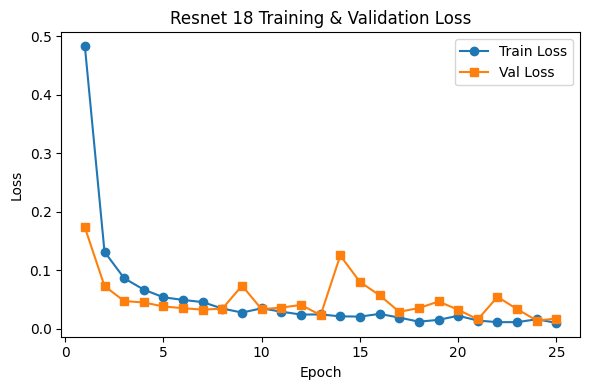


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,0.9905,0.9952,211.0
Tomato___Early_blight,0.9802,1.0000,0.9900,99.0
Tomato___Late_blight,0.9947,0.9894,0.9920,189.0
Tomato___Leaf_Mold,1.0000,1.0000,1.0000,99.0
Tomato___Septoria_leaf_spot,0.9943,1.0000,0.9972,175.0
Tomato___Spider_mites Two-spotted_spider_mite,1.0000,0.9880,0.9939,166.0
Tomato___Target_Spot,0.9858,1.0000,0.9929,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9962,0.9962,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9952
Epoch [1/25]  Train Loss: 0.3121  Val Loss: 0.0577  Time: 34.53s
Epoch [2/25]  Train Loss: 0.0779  Val Loss: 0.0382  Time: 34.48s
Epoch [3/25]  Train Loss: 0.0566  Val Loss: 0.0433  Time: 34.33s
Epoch [4/25]  Train Loss: 0.0451  Val Loss: 0.0230  Time: 34.46s
Epoch [5/25]  Train Loss: 0.0400  Val Loss: 0.0549  Time: 34.37s
Epoch [6/25]  Train Loss: 0.0355  Val Loss: 0.0504  Time: 34.36s
Epoch [7/25]  Train Loss: 0.0315  Val Loss: 0.0382  Time: 34.46s
Epoch [8/25]  Train Loss: 0.0273  Val Loss: 0.0303  Time: 34.38s
Epoch [9/25]  Train Loss: 0.0297  Val Loss: 0.0318  Time: 34.41s
Epoch [10/25]  Train Loss: 0.0260  Val Loss: 0.0216  Time: 34.39s
Epoch [11/25]  Train Loss: 0.0233  Val Loss: 0.0384  Time: 34.36s
Epoch [12/25]  Train Loss: 0.0195  Val Loss: 0.0333  Time: 34.33s
Epoch [13/25]  Train Loss: 0.0180  Val Loss: 0.0199  Time: 34.32s
Epoch [14/25]  Train Loss: 0.0160  Val Loss: 0.0407  Time: 34.34s
Epoch [15/25]  Train Loss: 0.0239  Val Loss: 0.0350  Time: 

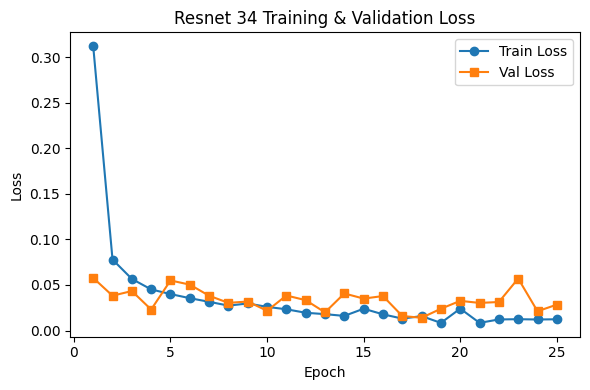


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9903,0.9716,0.9809,211.0
Tomato___Early_blight,0.9896,0.9596,0.9744,99.0
Tomato___Late_blight,0.9894,0.9841,0.9867,189.0
Tomato___Leaf_Mold,1.0000,0.9798,0.9898,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9943,0.9943,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9881,1.0000,0.9940,166.0
Tomato___Target_Spot,0.9718,0.9928,0.9822,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9907,1.0000,0.9953,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9903
Epoch [1/25]  Train Loss: 0.2082  Val Loss: 0.0455  Time: 71.69s
Epoch [2/25]  Train Loss: 0.0399  Val Loss: 0.0396  Time: 71.62s
Epoch [3/25]  Train Loss: 0.0356  Val Loss: 0.0577  Time: 71.65s
Epoch [4/25]  Train Loss: 0.0272  Val Loss: 0.0151  Time: 71.68s
Epoch [5/25]  Train Loss: 0.0143  Val Loss: 0.0452  Time: 71.67s
Epoch [6/25]  Train Loss: 0.0247  Val Loss: 0.0136  Time: 71.65s
Epoch [7/25]  Train Loss: 0.0186  Val Loss: 0.0425  Time: 71.65s
Epoch [8/25]  Train Loss: 0.0178  Val Loss: 0.0119  Time: 71.66s
Epoch [9/25]  Train Loss: 0.0181  Val Loss: 0.0200  Time: 71.61s
Epoch [10/25]  Train Loss: 0.0161  Val Loss: 0.0379  Time: 71.66s
Epoch [11/25]  Train Loss: 0.0068  Val Loss: 0.0182  Time: 71.61s
Epoch [12/25]  Train Loss: 0.0161  Val Loss: 0.0548  Time: 71.67s
Epoch [13/25]  Train Loss: 0.0164  Val Loss: 0.0259  Time: 71.64s
Epoch [14/25]  Train Loss: 0.0095  Val Loss: 0.0138  Time: 71.65s
Epoch [15/25]  Train Loss: 0.0191  Val Loss: 0.0202  Time: 

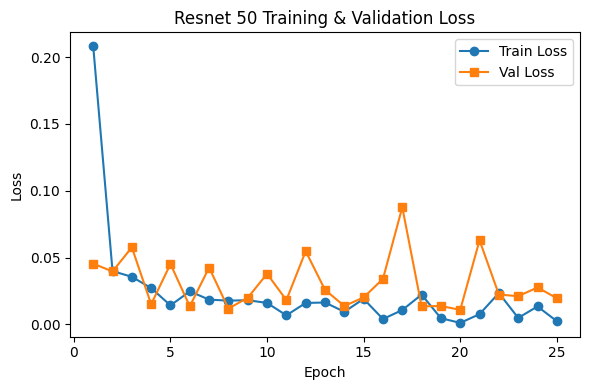


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,0.9858,0.9928,211.0
Tomato___Early_blight,0.9802,1.0000,0.9900,99.0
Tomato___Late_blight,1.0000,0.9894,0.9947,189.0
Tomato___Leaf_Mold,1.0000,1.0000,1.0000,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9886,0.9914,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9821,0.9940,0.9880,166.0
Tomato___Target_Spot,0.9857,0.9928,0.9892,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9981,0.9972,531.0
Tomato___Tomato_mosaic_virus,1.0000,0.9899,0.9949,99.0
Tomato___healthy,0.9937,1.0000,0.9968,157.0



✅ Genel Accuracy: 0.9941
📊 Evaluating ResNet18...
📊 Evaluating ResNet34...
📊 Evaluating ResNet50...

📈 Karşılaştırmalı Sınıflandırma Performansı:


,Model,Precision,Recall,F1-Score,Accuracy
0,ResNet18,0.9952,0.9952,0.9952,0.9952
1,ResNet34,0.9904,0.9903,0.9903,0.9903
2,ResNet50,0.9942,0.9941,0.9941,0.9941


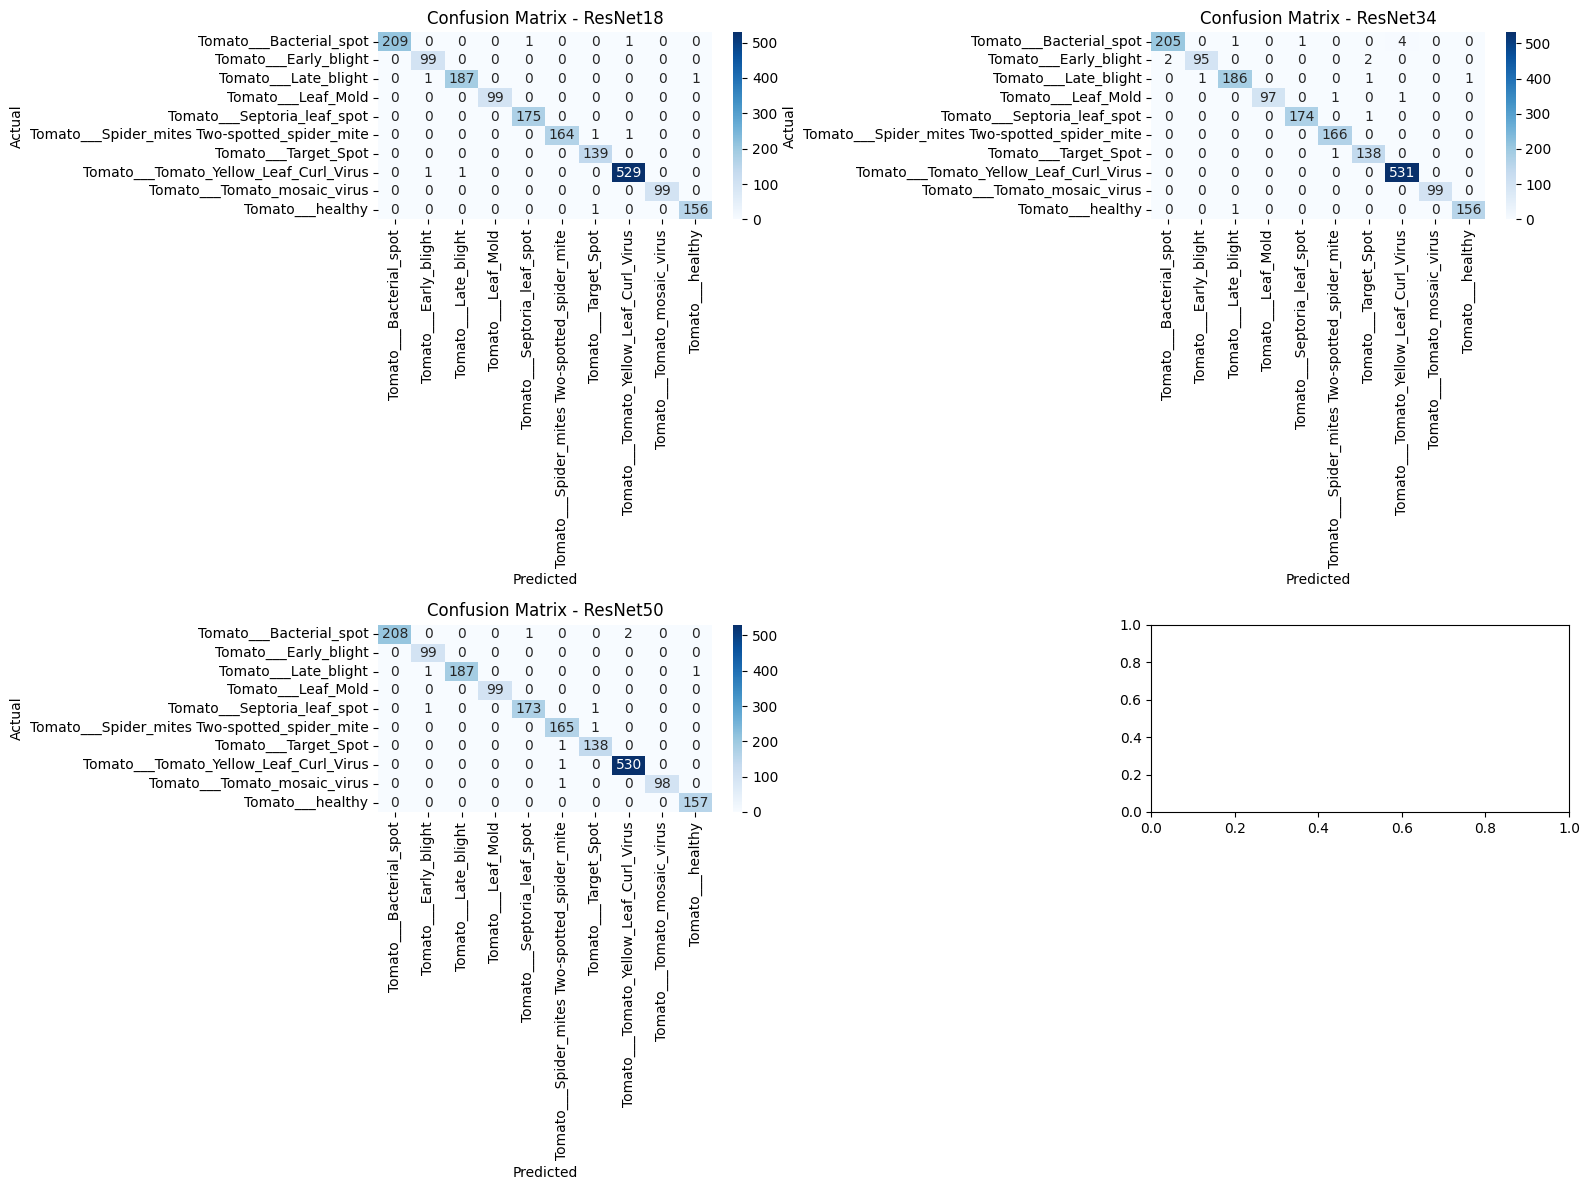

In [ ]:
#models_path_list = ["/content/drive/MyDrive/resnet_25_epoch/resnet18.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet34.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet50.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet101.pth"]
#models_name_list = ["resnet18", "resnet34", "resnet50", "resnet101"]

for i in important_channels_combined:

  # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

  #early stop mekanizması
  class EarlyStopping:
      def __init__(self, patience=5, min_delta=0.001):
          self.patience = patience
          self.min_delta = min_delta
          self.counter = 0
          self.best_loss = None
          self.early_stop = False

      def __call__(self, val_loss):
          if self.best_loss is None:
              self.best_loss = val_loss
          elif self.best_loss - val_loss > self.min_delta:
              self.best_loss = val_loss
              self.counter = 0
          else:
              self.counter += 1
              if self.counter >= self.patience:
                  self.early_stop = True

  # model1i oluştur
  model1 = timm.create_model("resnet18", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_25_epoch/standart/resnet18.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model1.load_state_dict(state_dict, strict=False)
  model1.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model1.layer4[-1].conv2  # resnet18'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model1.parameters(), lr=1e-4)

  # Eğitim
  epochs = 25
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model1.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model1(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model1.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model1(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)

      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 18 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model1.state_dict(), "resnet18_pruned.pth")

  # Değerlendirme
  model1.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model1(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 18 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''
  # ResNet34 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  '''
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
'''

  # model2i oluştur
  model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_25_epoch/standart/resnet34.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model2.load_state_dict(state_dict, strict=False)
  model2.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum semantic kanallar
  conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

  # Eğitim
  epochs = 10
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model2.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model2(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model2.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model2(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 34 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model2.state_dict(), "resnet34_pruned.pth")

  # Değerlendirme
  model2.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model2(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 34 pruned Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''

  # ResNet50 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  '''
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  '''

  # model3ü oluştur
  model3 = timm.create_model("resnet50", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_25_epoch/standart/resnet50.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model3.load_state_dict(state_dict, strict=False)
  model3.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model3.layer4[-1].conv3

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4)

  # Eğitim
  #epochs = 25
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model3.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model3(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model3.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model3(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, epochs+1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 50 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model3.state_dict(), "resnet50_pruned.pth")

  # Değerlendirme
  model3.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model3(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 50 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''

# evaluate kısmı, tüm modeller tek tek inceleniyor
  def evaluate_model(model, dataloader, class_names, device):
      model.eval()
      all_preds, all_labels = [], []

      with torch.no_grad():
          for images, labels in dataloader:
              images = images.to(device)
              outputs = model(images)
              _, preds = torch.max(outputs, 1)
              all_preds.extend(preds.cpu().numpy())
              all_labels.extend(labels.numpy())
      report = classification_report(
          all_labels, all_preds,
          target_names=class_names,
          output_dict=True
      )

      cm = confusion_matrix(all_labels, all_preds, labels=range(len(class_names)))
      return report, cm

      # Değerlendirmeyi yapacağımız modeller
  models = {
      "ResNet18": model1,
      "ResNet34": model2,
      "ResNet50": model3
  }

  reports = {}
  conf_matrices = {}

  for name, model in models.items():
      print(f"📊 Evaluating {name}...")
      report, cm = evaluate_model(model, test_loader, class_names, device)
      reports[name] = report
      conf_matrices[name] = cm

      # Her model için weighted avg (veya macro avg) precision, recall, f1-score değerlerini toplayalım
  summary_data = []

  for name, report in reports.items():
      row = {
          "Model": name,
          "Precision": report["weighted avg"]["precision"],
          "Recall": report["weighted avg"]["recall"],
          "F1-Score": report["weighted avg"]["f1-score"],
          "Accuracy": report["accuracy"]
      }
      summary_data.append(row)
  summary_df = pd.DataFrame(summary_data)
  summary_df = summary_df.round(4)
  print("\n📈 Karşılaştırmalı Sınıflandırma Performansı:")
  display(summary_df)

  fig, axes = plt.subplots(2, 2, figsize=(16, 12))
  axes = axes.flatten()

  for idx, (name, cm) in enumerate(conf_matrices.items()):
      ax = axes[idx]
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=class_names,
                  yticklabels=class_names,
                  ax=ax)
      ax.set_title(f"Confusion Matrix - {name}")
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')

  plt.tight_layout()
  plt.show()